In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [2]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:07<00:00, 24.5MB/s]
100% 149M/149M [00:07<00:00, 20.5MB/s]


In [3]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


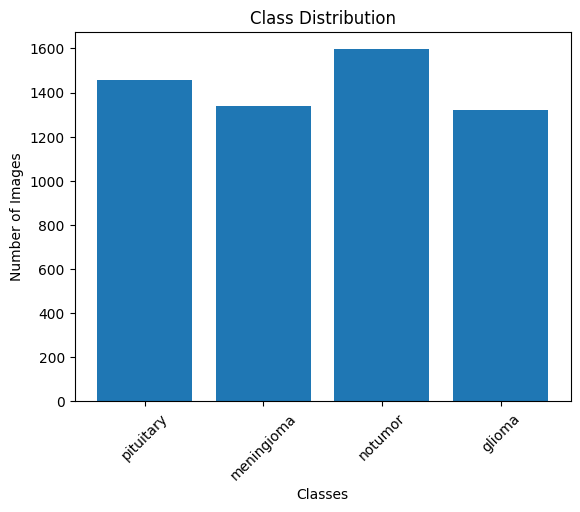

In [ ]:
# Training Folder
import matplotlib.pyplot as plt
import os
from collections import Counter

# Path to your dataset
dataset_dir = '/content/Training'

# Get list of class labels
class_labels = [label for label in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, label))]

# Count the number of images in each class
class_counts = Counter()
for label in class_labels:
    class_counts[label] = len(os.listdir(os.path.join(dataset_dir, label)))

# Plot class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

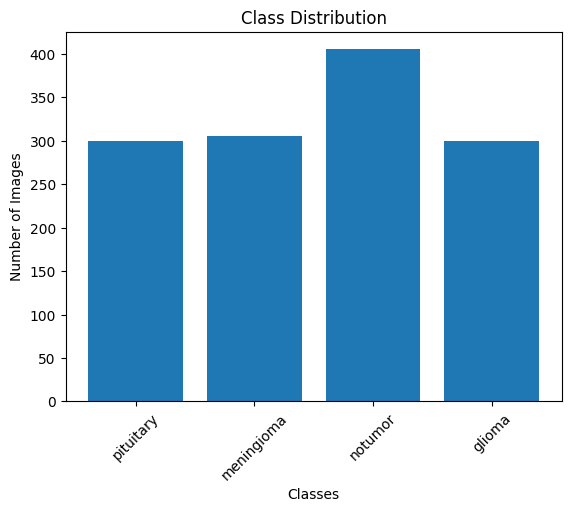

In [ ]:
  # Testing Folder
import matplotlib.pyplot as plt
import os
from collections import Counter

# Path to your dataset
dataset_dir = '/content/Testing'

# Get list of class labels
class_labels = [label for label in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, label))]

# Count the number of images in each class
class_counts = Counter()
for label in class_labels:
    class_counts[label] = len(os.listdir(os.path.join(dataset_dir, label)))

# Plot class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import glob as gb
import cv2
import tensorflow  as tf
import keras
from tqdm import tqdm
from collections import Counter
from keras import Model
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
width=224
height=224
color_channels=3
image_size = (width, height, color_channels)

In [ ]:
def read_images_from_directory(folder_path, desc):
    """
    Analyzes the sizes of JPEG images within each subfolder of the given directory.

    Parameters:
    - train_path: str. The path to the directory containing subfolders of images.
    - desc: str. A description for the tqdm progress bar.

    Returns:
    - A pandas Series object with the counts of each unique image size.
    """
    images = []
    labels=[]

    # Iterate through each folder in the given directory with a progress bar

    for folder in os.listdir(folder_path):
        files = gb.glob(pathname=str(folder_path + '/' + folder + '/*.jpg'))

        # For each file in the current folder, read the image and append its size
        for file in tqdm(files, desc=desc+" in "+folder):
            image = plt.imread(file)
            img_resized=cv2.resize(image,(width,height))
            img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            images.append(img_rgb)
            labels.append(folder)


    # Count the occurrence of each unique size
    return images,labels

In [ ]:
x_train,y_train= read_images_from_directory("/content/Training", "Loading Training Data")

Loading Training Data in glioma: 100%|██████████| 1321/1321 [00:02<00:00, 654.87it/s]


In [ ]:
x_test,y_test= read_images_from_directory("/content/Testing", "Loading Testing Data")

Loading Testing Data in glioma: 100%|██████████| 300/300 [00:00<00:00, 736.50it/s]


In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(f'X_train shape  is {x_train.shape}')
print(f'X_test shape  is {x_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (5712, 224, 224, 3)
X_test shape  is (1311, 224, 224, 3)
y_train shape  is (5712,)
y_test shape  is (1311,)


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder and return encoded labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

In [ ]:
EfficientNet = keras.applications.EfficientNetB0(include_top = False, weights = "imagenet", input_shape=image_size)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential()
model.add(EfficientNet)
model.add(layers.Flatten())
# Add final classification layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train_encoded, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
143/143 [==============================] - 89s 314ms/step - loss: 0.2750 - accuracy: 0.9166 - val_loss: 1.0264 - val_accuracy: 0.7069
Epoch 2/20
143/143 [==============================] - 40s 281ms/step - loss: 0.0346 - accuracy: 0.9866 - val_loss: 1.1287 - val_accuracy: 0.7778
Epoch 3/20
143/143 [==============================] - 41s 283ms/step - loss: 0.0207 - accuracy: 0.9939 - val_loss: 2.4361 - val_accuracy: 0.5827
Epoch 4/20
143/143 [==============================] - 40s 283ms/step - loss: 0.0124 - accuracy: 0.9956 - val_loss: 0.8975 - val_accuracy: 0.8154
Epoch 5/20
143/143 [==============================] - 41s 284ms/step - loss: 0.0065 - accuracy: 0.9974 - val_loss: 1.0835 - val_accuracy: 0.8154
Epoch 6/20
143/143 [==============================] - 40s 283ms/step - loss: 0.0118 - accuracy: 0.9947 - val_loss: 1.3704 - val_accuracy: 0.7997
Epoch 7/20
143/143 [==============================] - 40s 281ms/step - loss: 0.0222 - accuracy: 0.9932 - val_loss: 2.2869 - val_ac

In [ ]:
model.save("/content/drive/My Drive/ML-Project-Models/EfficientNetB0.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


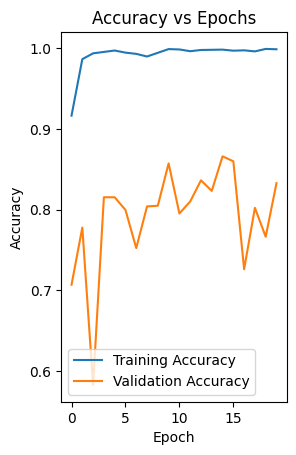

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()


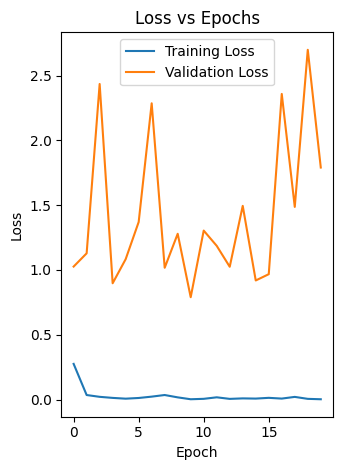

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers


In [15]:
#Generate data paths with labels
train_data_dir = '/content/Training'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [18]:
# Generate data paths with labels
test_data_dir = '/content/Testing'
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [19]:
# valid and test dataframe
valid_df, test_df = train_test_split(ts_df,  train_size= 0.2)

In [20]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 262 validated image filenames belonging to 4 classes.
Found 1049 validated image filenames belonging to 4 classes.


In [ ]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
# base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation= 'relu'),
    Dropout(rate= 0.35),
    Dense(256, activation= 'relu'),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adam(learning_rate= 0.00001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 4)                 1028      
                                                      

In [ ]:
epochs = 20   # number of all epochs in training
batch = 32
history = model.fit(x= train_gen, epochs= epochs, batch_size=batch, validation_data= valid_gen)

Epoch 1/20
357/357 [==============================] - 92s 163ms/step - loss: 2.0518 - accuracy: 0.4314 - val_loss: 1.0708 - val_accuracy: 0.6489
Epoch 2/20
357/357 [==============================] - 52s 144ms/step - loss: 0.9941 - accuracy: 0.6646 - val_loss: 0.6518 - val_accuracy: 0.7824
Epoch 3/20
357/357 [==============================] - 52s 146ms/step - loss: 0.6698 - accuracy: 0.7654 - val_loss: 0.5010 - val_accuracy: 0.8397
Epoch 4/20
357/357 [==============================] - 52s 146ms/step - loss: 0.5347 - accuracy: 0.8092 - val_loss: 0.4087 - val_accuracy: 0.8550
Epoch 5/20
357/357 [==============================] - 53s 147ms/step - loss: 0.4517 - accuracy: 0.8423 - val_loss: 0.3734 - val_accuracy: 0.8702
Epoch 6/20
357/357 [==============================] - 52s 145ms/step - loss: 0.3987 - accuracy: 0.8617 - val_loss: 0.3414 - val_accuracy: 0.8740
Epoch 7/20
357/357 [==============================] - 52s 147ms/step - loss: 0.3385 - accuracy: 0.8841 - val_loss: 0.3027 - val_ac

In [ ]:
model.save("/content/drive/My Drive/ML-Project-Models/modifiedEfficientNetB0.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


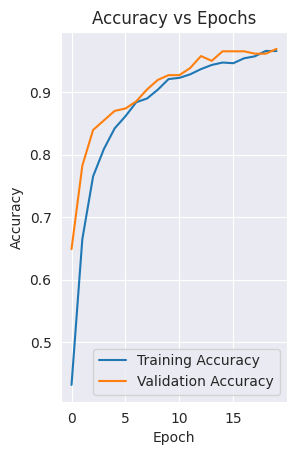

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

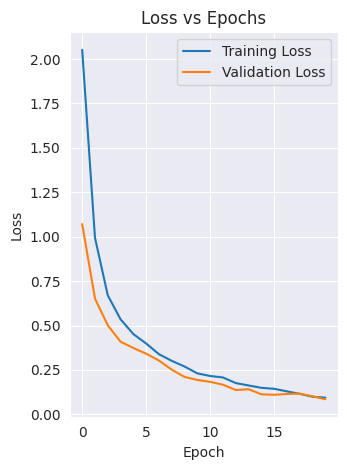

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# Fine Tunning

In [22]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape)

In [23]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_1

In [24]:
for layer in base_model.layers:
  layer.trainable = False;

In [25]:
base_model.layers[-1].trainable = True
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True
base_model.layers[-5].trainable = True
base_model.layers[-6].trainable = True
base_model.layers[-7].trainable = True
base_model.layers[-8].trainable = True

In [26]:
FineTunnedEfficientNetB0 = Sequential([
    base_model,
    MaxPooling2D(pool_size=(3,3)),
    Conv2D(1280, (3,3), padding='same', activation= 'relu'),
    Conv2D(1080, (5,5), padding='same', activation= 'relu'),
    Dropout(rate= 0.35),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(720, (3,3), padding='same', activation= 'relu'),
    Flatten(),
    Dense(256, activation= 'relu'),
    Dropout(rate= 0.35),
    Dense(256, activation= 'relu'),
    Dense(4, activation= 'softmax')
])
FineTunnedEfficientNetB0.compile(Adam(learning_rate= 0.00001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

FineTunnedEfficientNetB0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 1280)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 1280)        14746880  
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 1080)        34561080  
                                                                 
 dropout_2 (Dropout)         (None, 2, 2, 1080)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 1, 1, 1080)       

In [27]:
epochs = 25   # number of all epochs in training
batch = 64
history = FineTunnedEfficientNetB0.fit(x= train_gen, epochs= epochs, batch_size=batch, validation_data= valid_gen)

Epoch 1/25
357/357 [==============================] - 77s 156ms/step - loss: 0.7076 - accuracy: 0.7348 - val_loss: 0.4558 - val_accuracy: 0.8206
Epoch 2/25
357/357 [==============================] - 51s 143ms/step - loss: 0.3361 - accuracy: 0.8794 - val_loss: 0.3310 - val_accuracy: 0.8817
Epoch 3/25
357/357 [==============================] - 51s 142ms/step - loss: 0.2603 - accuracy: 0.9076 - val_loss: 0.2401 - val_accuracy: 0.9198
Epoch 4/25
357/357 [==============================] - 51s 142ms/step - loss: 0.2093 - accuracy: 0.9252 - val_loss: 0.2487 - val_accuracy: 0.8969
Epoch 5/25
357/357 [==============================] - 51s 143ms/step - loss: 0.1646 - accuracy: 0.9435 - val_loss: 0.1528 - val_accuracy: 0.9427
Epoch 6/25
357/357 [==============================] - 51s 142ms/step - loss: 0.1342 - accuracy: 0.9517 - val_loss: 0.1684 - val_accuracy: 0.9466
Epoch 7/25
357/357 [==============================] - 51s 142ms/step - loss: 0.1190 - accuracy: 0.9620 - val_loss: 0.1210 - val_ac

In [28]:
FineTunnedEfficientNetB0.save("/content/drive/My Drive/ML-Project-Models/FineTunnedEfficientNetB0.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


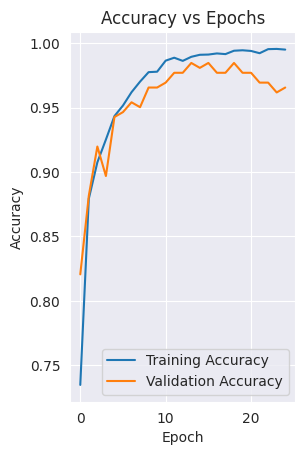

In [29]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

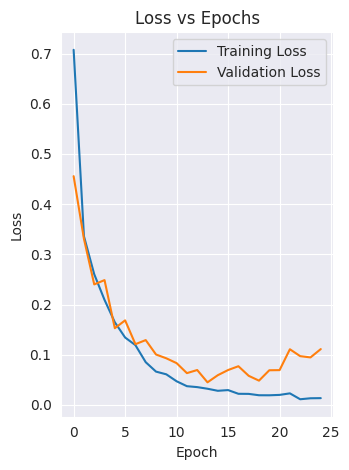

In [30]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
import keras
from tensorflow.keras.models import load_model
model_path = ("/content/drive/MyDrive/ML-Project-Models/FineTunnedEfficientNetB0.h5")
FineTunnedEfficientNetB0 = load_model(model_path)